In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('data.xlsx')
df.head()

,Year,Month,Monthly Consumption of Type A Medicine
0,2015,Jan,1601
1,2015,Feb,1963
2,2015,Mar,2439
3,2015,Apr,2747
4,2015,May,3032


In [12]:
df['Timestamp'] = pd.to_datetime(df['Year'].astype(str)  + df['Month'], format='%Y%b')

In [15]:
df.rename(index=str, columns={"Monthly Consumption of Type A Medicine": "count"}, inplace = True)

In [16]:
df.index = df.Timestamp

In [30]:
len(df['count'])

36

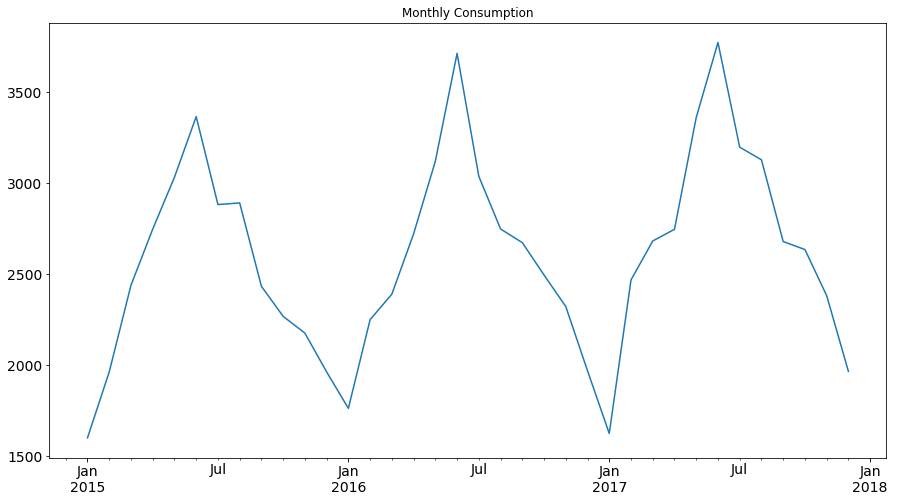

In [20]:
df['count'].plot(figsize=(15,8), title= 'Monthly Consumption', fontsize=14)
plt.show()

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

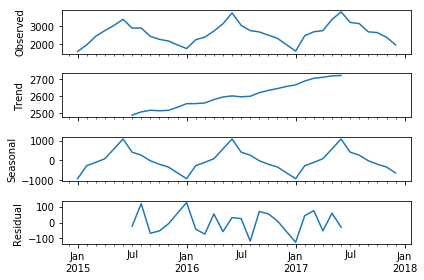

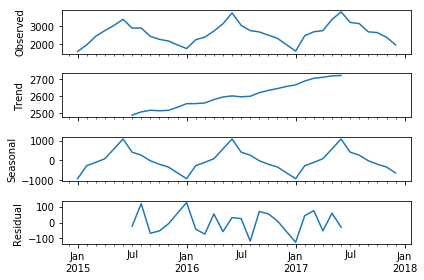

In [23]:
sm.tsa.seasonal_decompose(df['count']).plot()

In [31]:
fit1 = ExponentialSmoothing(np.asarray(df['count']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
prediction = fit1.forecast(4)

In [44]:
forecast = prediction.tolist()

In [60]:
months = ['Jan', 'Feb', 'Mar', 'Apr']
fc = pd.DataFrame(columns=['Year', 'Month', 'count'])
for i in range(len(months)):
    fc = fc.append({'Year': 2018, 'Month': months[i], 'count': forecast[i]}, ignore_index=True)

In [61]:
fc['Timestamp'] = pd.to_datetime(fc['Year'].astype(str)  + fc['Month'], format='%Y%b')

In [62]:
fc.index = fc.Timestamp
fc

,Year,Month,count,Timestamp
Timestamp,,,,
2018-01-01,2018,Jan,1821.554151,2018-01-01
2018-02-01,2018,Feb,2523.886567,2018-02-01
2018-03-01,2018,Mar,2747.991914,2018-03-01
2018-04-01,2018,Apr,2904.985525,2018-04-01


In [68]:
result = df.append(fc)

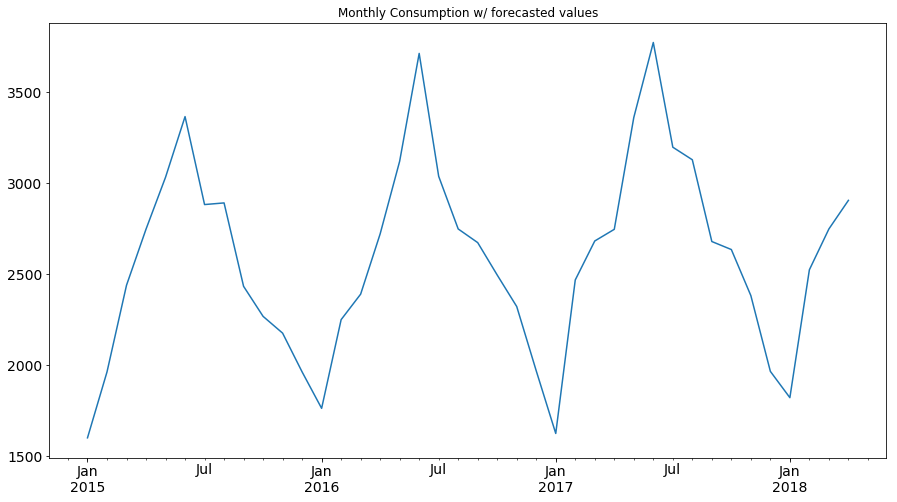

In [70]:
result['count'].plot(figsize=(15,8), title= 'Monthly Consumption w/ forecasted values', fontsize=14)
plt.show()